In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
FILE = '~/GitHub/ci-analysis/travistorrent_11_1_2017.csv.gz'

In [3]:
dataset = pd.read_csv(FILE, sep=',', engine='c',usecols=['gh_team_size',
                                                         'tr_build_id',
                                                         'gh_project_name',
                                                         'tr_build_id',
                                                         'gh_project_name',
                                                         'gh_is_pr',
                                                         'gh_pr_created_at',
                                                         'gh_lang',
                                                         'git_branch',
                                                         'gh_num_commits_in_push',
                                                         'git_prev_commit_resolution_status',
                                                         'tr_prev_build',
                                                         'gh_first_commit_created_at',
                                                         'gh_team_size',         
                                                         'gh_pushed_at',
                                                         'gh_sloc',
                                                         'tr_log_bool_tests_failed',
                                                         'tr_log_setup_time',
                                                         'tr_log_buildduration',
                                                         'tr_status'],dtype={ 'tr_build_id': np.float32,
                                                                                            'gh_project_name': 'category',
                                                                                            'gh_is_pr': np.bool,
                                                                                            'gh_pr_created_at': 'category',
                                                                                            'gh_lang': 'category',
                                                                                            'git_branch': 'category',
                                                                                            'gh_num_commits_in_push': np.float32,
                                                                                            'git_prev_commit_resolution_status': 'category',
                                                                                            'tr_prev_build': np.float32,
                                                                                            'gh_first_commit_created_at': 'category',
                                                                                            'gh_team_size': np.int32,
                                                                                            'gh_pushed_at': 'category',                                                                                           
                                                                                            'gh_sloc': np.int32}, encoding='utf-8')


In [4]:
dataset = dataset.loc[dataset['git_branch'] == 'master'] #filter only projects in the master
dataset = dataset[dataset.gh_lang != 'javascript'] #remove projects java script
dataset = dataset.dropna(subset=['gh_num_commits_in_push']) #remove NaN in the column specified
dataset['gh_pushed_at'] = pd.to_datetime(dataset.gh_pushed_at) #transforms for datetime
dataset = dataset.drop_duplicates(['tr_build_id']) #remove duplicates

# RQ1

## 1 Commit

In [20]:
df = dataset.loc[dataset['gh_num_commits_in_push'] == 1]

## Verifica se ha ao menos 1 comitt durante o dia util(seg a sex).

In [13]:
## Verifica se ha ao menos 1 comitt durante o dia util(seg a sex).

cont = 0

list_name = df.gh_project_name.unique().tolist()

for i in range(len(list_name)):

    df_project = df.loc[dff['gh_project_name'] == list_name[i]]
    
    commits_per_day = df_project.gh_num_commits_in_push.tolist() # numero de commits por dia
    date = df_project.gh_pushed_at.dt.weekday.tolist() # dias da semana
    
    
    for i in range(len(date)):

        
        if(date[i] != 5 or date[i]!= 6):
            if(commits_per_day[i] == 1):
                cont +=1
                break
        
print("Projetos com 1 commit por dia util: {} ".format(cont))

Projetos com 1 commit por dia util: 1242 


## Verifica se possui frequencia de commit por semana somente dia util

In [14]:
## Verifica se possui frequencia de commit por semana somente dia util

list_mean_commit = []

list_name = df.gh_project_name.unique().tolist()

for i in range(len(list_name)):

    df_project = df.loc[dataset['gh_project_name'] == list_name[i]]
    
    commits_per_day = df_project.gh_num_commits_in_push.tolist() # numero de commits por dia
    date = df_project.gh_pushed_at.dt.weekday.tolist() # dias da semana
    

    mon   = 0
    tues  = 0
    wedn  = 0
    thurs = 0
    frid  = 0
    
    for i in range(len(date)):
        
        
        if  (date[i] == 0 and commits_per_day[i] == 0):
            mon +=1
        elif(date[i] == 1 and commits_per_day[i] == 0):
            tues += 1
        elif(date[i] == 2 and commits_per_day[i] == 0):
            wedn += 1
        elif(date[i] == 3 and commits_per_day[i] == 0):
            thurs += 1
        elif(date[i] == 4 and commits_per_day[i] == 0):
            frid += 1
        
        sum_commit = mon + tues + wedn + thurs + frid 
       
        mean_sum_commit = (sum_commit / 5)
        
        list_mean_commit.append(mean_sum_commit)
        
#print('Lista de media ', list_mean_commit)

## Projetos Ruby - Verifica se ha ao menos 1 comitt durante o dia util(seg a sex).

In [15]:
## Tamanhos de Projetos ruby - Verifica se ha ao menos 1 comitt durante o dia util(seg a sex).

def project_ruby():
    cont = 0

    project_name = []


    data_ruby = df.loc[dataset['gh_lang'] == 'ruby']
    list_name = data_ruby.gh_project_name.unique().tolist()

    for i in range(len(list_name)):

        df_project = data_ruby.loc[data_ruby['gh_project_name'] == list_name[i]]

        commits_per_day = df_project.gh_num_commits_in_push.tolist() # numero de commits por dia
        date = df_project.gh_pushed_at.dt.weekday.tolist() # dias da semana


        for j in range(len(date)):


            if(date[j] != 5 or date[j]!= 6):
                if(commits_per_day[j] == 1):
                    cont +=1
                    project_name.append(list_name[i])
                    break
    return(project_name)

print(f"Projetos ruby com 1 commit por dia util {len(project_ruby())}")

Projetos ruby com 1 commit por dia util 870


## Projetos Java - Verifica se ha ao menos 1 comitt durante o dia util(seg a sex).

In [16]:
## Tamanhos de Projetos Java - Verifica se ha ao menos 1 comitt durante o dia util(seg a sex).

def project_java():
    cont = 0

    project_name = []


    data_java = df.loc[dataset['gh_lang'] == 'java']
    list_name = data_java.gh_project_name.unique().tolist()

    for i in range(len(list_name)):

        df_project = data_java.loc[data_java['gh_project_name'] == list_name[i]]

        commits_per_day = df_project.gh_num_commits_in_push.tolist() # numero de commits por dia
        date = df_project.gh_pushed_at.dt.weekday.tolist() # dias da semana


        for j in range(len(date)):


            if(date[j] != 5 or date[j]!= 6):
                if(commits_per_day[j] == 1):
                    cont +=1
                    project_name.append(list_name[i])
                    break
    return(project_name)

print(f"Projetos java com 1 commit por dia util {len(project_java())}")

Projetos java com 1 commit por dia util 372


## Tamanhos dos Projetos

In [23]:
# Recebe a linguagem para filtrar, uma lista com o nomes dos projetos e qual tamanho será filtrado
def quantidade_projetos_all(language, list_project , sett):
    very_small, small, medium, large, very_large = [],[],[],[],[]
    
    df = dataset.loc[dataset['gh_num_commits_in_push'] == 1]
    df = df.sort_values(['gh_sloc'], ascending=False)
    df = df.loc[df['gh_lang'] == language]
    
    list_name_project = list_project

    if(sett == 1):
        for name in list_name_project:
            df0 = df.loc[df['gh_project_name'] == name]
            if(1000 > df0.gh_sloc[0:1].item()):
                very_small.append(name)
                
        return(very_small) 
        
    if(sett == 2):
        for name in list_name_project:
            df1 = df.loc[df['gh_project_name'] == name]
            if((1000 < df1.gh_sloc[0:1].item()) and (10000 > df1.gh_sloc[0:1].item())):
                small.append(name)
        return(small)
        
    if(sett == 3):
        for name in list_name_project:
            df2 = df.loc[df['gh_project_name'] == name]
            if((10000 < df2.gh_sloc[0:1].item()) and (100000 > df2.gh_sloc[0:1].item())):
                medium.append(name)
        return(medium)
        
    if(sett == 4):
        for name in list_name_project:
            df3 = df.loc[df['gh_project_name'] == name]
            if((100000 < df3.gh_sloc[0:1].item()) and (1000000 > df3.gh_sloc[0:1].item())):
                large.append(name)
        return(large)
        
    if(sett == 5):
        for name in list_name_project:
            df4 = df.loc[df['gh_project_name'] == name]
            if(1000000 <= df4.gh_sloc[0:1].item()):
                very_large.append(name)
        return(very_large)

## Tamanho dos Projetos Java 

In [24]:
print(f"Projetos vary small Java {len(quantidade_projetos_all('java', project_java(), 1))} projetos")
print(f"Projetos small Java      {len(quantidade_projetos_all('java', project_java(), 2))} projetos")
print(f"Projetos medium Java     {len(quantidade_projetos_all('java', project_java(), 3))} projetos")
print(f"Projetos large Java      {len(quantidade_projetos_all('java', project_java(), 4))} projetos")
print(f"Projetos very large Java {len(quantidade_projetos_all('java', project_java(), 5))} projetos")

/home/work/myvenv/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: `item` has been deprecated and will be removed in a future version
  


Projetos vary small Java 14 projetos


/home/work/myvenv/lib/python3.7/site-packages/ipykernel_launcher.py:22: FutureWarning: `item` has been deprecated and will be removed in a future version


Projetos small Java      153 projetos


/home/work/myvenv/lib/python3.7/site-packages/ipykernel_launcher.py:29: FutureWarning: `item` has been deprecated and will be removed in a future version


Projetos medium Java     179 projetos


/home/work/myvenv/lib/python3.7/site-packages/ipykernel_launcher.py:36: FutureWarning: `item` has been deprecated and will be removed in a future version


Projetos large Java      26 projetos


/home/work/myvenv/lib/python3.7/site-packages/ipykernel_launcher.py:43: FutureWarning: `item` has been deprecated and will be removed in a future version


Projetos very large Java 0 projetos


## Tamanho dos Projetos Ruby

In [25]:
print(f"Projetos vary small ruby {len(quantidade_projetos_all('ruby', project_ruby(), 1))} projetos")
print(f"Projetos small ruby      {len(quantidade_projetos_all('ruby', project_ruby(), 2))} projetos")
print(f"Projetos medium ruby     {len(quantidade_projetos_all('ruby', project_ruby(), 3))} projetos")
print(f"Projetos large ruby      {len(quantidade_projetos_all('ruby', project_ruby(), 4))} projetos")
print(f"Projetos very large ruby {len(quantidade_projetos_all('ruby', project_ruby(), 5))} projetos")

/home/work/myvenv/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: `item` has been deprecated and will be removed in a future version
  


Projetos vary small ruby 326 projetos


/home/work/myvenv/lib/python3.7/site-packages/ipykernel_launcher.py:22: FutureWarning: `item` has been deprecated and will be removed in a future version


Projetos small ruby      462 projetos


/home/work/myvenv/lib/python3.7/site-packages/ipykernel_launcher.py:29: FutureWarning: `item` has been deprecated and will be removed in a future version


Projetos medium ruby     75 projetos


/home/work/myvenv/lib/python3.7/site-packages/ipykernel_launcher.py:36: FutureWarning: `item` has been deprecated and will be removed in a future version


Projetos large ruby      7 projetos


/home/work/myvenv/lib/python3.7/site-packages/ipykernel_launcher.py:43: FutureWarning: `item` has been deprecated and will be removed in a future version


Projetos very large ruby 0 projetos


## Plot size of all projects

In [60]:
def plot_bar(sett, language, very_small,low, medium, high):
    
    # Dados do grafico
    if(sett == 0):
        frequency_low = [len(low[0]),len(low[1]),len(low[2]),len(low[3]),len(low[4]),len(low[5]),len(low[6]),len(low[7]),len(low[8]),len(low[9]),len(low[10]),len(low[11])]
        frequency_medium = [len(medium[0]),len(medium[1]),len(medium[2]),len(medium[3]),len(medium[4]),len(medium[5]),len(medium[6]),len(medium[7]),len(medium[8]),len(medium[9]),len(medium[10]),len(medium[11])]
        frequency_high = [len(high[0]),len(high[1]),len(high[2]),len(high[3]),len(high[4]),len(high[5]),len(high[6]),len(high[7]),len(high[8]),len(high[9]),len(high[10]),len(high[11])]

        labels_list = ["january", "february", "march", "april", "may", "june", "july", "august", "september", "october", "november", "december"]
    if(sett == 1):
        frequency_very_small = [len(very_small[0]),len(very_small[1]),len(very_small[2]),len(very_small[3]),len(very_small[4]),len(very_small[5]),len(very_small[6])]
        frequency_low = [len(low[0]),len(low[1]),len(low[2]),len(low[3]),len(low[4]),len(low[5]),len(low[6])]
        frequency_medium = [len(medium[0]),len(medium[1]),len(medium[2]),len(medium[3]),len(medium[4]),len(medium[5]),len(medium[6])]
        frequency_high = [len(high[0]),len(high[1]),len(high[2]),len(high[3]),len(high[4]),len(high[5]),len(high[6])]

        labels_list = ['Monday', 'Tuesday','wednesday','thursday ','friday','saturday','sunday']
        
    # Largura das barras
    barWidth = 0.20
    
    # Tamanho do Grafico
    plt.figure(figsize=(10,9))
    
    # Posicao da barras
    r1 = np.arange(len(frequency_very_small))
    r2 = [x + barWidth for x in r1]
    r3 = [x + barWidth for x in r2]
    r4 = [x + barWidth for x in r3]
    
    
    # Criando as barras
    plt.bar(r1, frequency_very_small, color='#303F9F', width=barWidth, label='Very Small')
    plt.bar(r2, frequency_low, color='#03A9F4', width=barWidth, label='Small')
    plt.bar(r3, frequency_medium, color='#3F51B5', width=barWidth, label='Medium')
    plt.bar(r4, frequency_high, color='#212121', width=barWidth, label='Large')
    
    # Adicionando legendas as barras
    if(sett == 0):
        plt.xlabel('Months', fontsize=15)
    if(sett == 1):
        plt.xlabel('Weekday', fontsize=15)
   
    plt.xticks([r + barWidth for r in  range(len(frequency_low))], labels_list)
    plt.ylabel('Quantity of commits', fontsize=15)
    plt.title('{}'.format(language), fontsize=15)
    
    
    plt.legend()
    plt.savefig('frequencia_por_dia_semana2', format='png')
    plt.show()
  

## Frequency per day and month

In [61]:
def weekday_frequency(dataframe): #weekday
    
    dataframe = dataframe.gh_pushed_at.dt.weekday

    monday  = []
    tuesday  = []
    wednesday = []
    thursday  = []
    friday = []
    saturday = []
    sunday = []

    for date in dataframe:
        if(date == 0):
            monday.append(date)
        elif(date == 1):
            tuesday.append(date)
        elif(date == 2):
            wednesday.append(date)
        elif(date == 3):
            thursday.append(date)
        elif(date == 4):
            friday.append(date)
        elif(date == 5):
            saturday.append(date)
        elif(date == 6):
            sunday.append(date)
            
    #print("\nMonday: {} commits \n Tuesday: {} \n wednesday: {} \n Thursday: {} \n Friday: {} \n Saturday: {}\n Sunday: {}".format(len(monday), len(tuesday), len(wednesday), len(thursday), len(friday), len(saturday), len(sunday)))
      
    return([monday, tuesday, wednesday, thursday, friday, saturday, sunday])

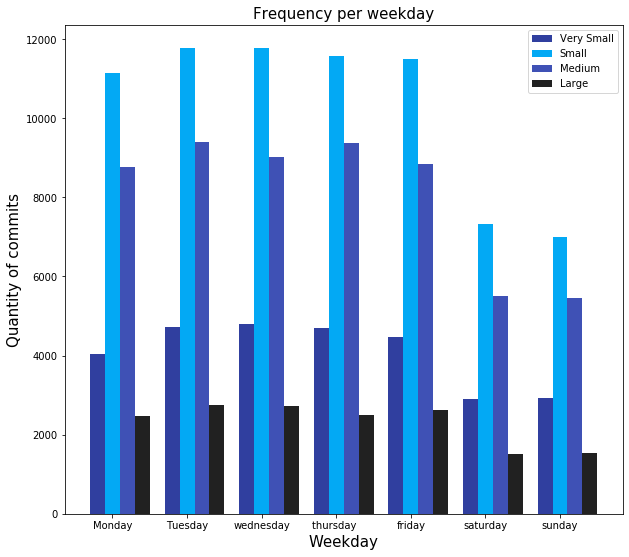

In [62]:
def project(sett):
    #dataset = dataset.sort_values(['gh_sloc'], ascending=False)
    if(sett == 1): #abaixo de 1000 linhas
        df1 = df.loc[dataset['gh_sloc'] < 1000]
        return(df1)
    
    if(sett == 2): #acima de 1000 e menos que 10.000
        df2 = df.loc[dataset['gh_sloc'] < 10000]
        df2 = df2.loc[df2['gh_sloc'] > 1000]
        return(df2)
    
    if(sett == 3): #acima de 10.000 linhas e menos que 100.000
        df3 = df.loc[dataset['gh_sloc'] < 100000]
        df3 = df3.loc[df3['gh_sloc'] > 10000]
        return(df3)
    
    if(sett == 4): #acima de 100.000 linhas
        df4 = df.loc[dataset['gh_sloc'] > 100000]
        return(df4)        
    
df_very_small = project(1)

df_small = project(2)

df_medium = project(3)

df_large = project(4)


weekday_very_small = weekday_frequency(df_very_small)
weekday_small = weekday_frequency(df_small)
weekday_medium = weekday_frequency(df_medium)
weekday_large = weekday_frequency(df_large)

plot_bar(1, 'Frequency per weekday', weekday_very_small, weekday_small, weekday_medium, weekday_large)

# Serie Temporal - Quantidade de builds ao longo dos anos

## 2012

In [49]:
df_2012 = dataset.loc[dataset.gh_pushed_at.dt.year == 2012]

len(df_2012)

51815

## 2013

In [50]:
df_2013 = dataset.loc[dataset.gh_pushed_at.dt.year == 2013]

len(df_2013)

99006

## 2014

In [51]:
df_2014 = dataset.loc[dataset.gh_pushed_at.dt.year == 2014]

len(df_2014)

120218

## 2015

In [52]:
df_2015 = dataset.loc[dataset.gh_pushed_at.dt.year == 2015]

len(df_2015)

98371

## 2016

In [53]:
df_2016 = dataset.loc[dataset.gh_pushed_at.dt.year == 2016]

len(df_2016)

858

370268

370268